## Unit 3- Statistics for Data Science

### Lesson 3, Section 7- Drill and Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [17]:
from scipy.stats import ttest_ind

In [88]:
def sampling(_pop1, _pop2, n, plot):
    sample1 = np.random.choice(_pop1, n, replace = True)
    sample2 = np.random.choice(_pop2, n, replace = True)
    
    if plot == 'y':
        plt.hist(sample1, alpha=.4, label='sample1')
        plt.hist(sample2, alpha=.4, label='sample2')
        plt.title('random samples, n=100')
        plt.legend(loc = 'upper right')

        print('mu_1=', sample1.mean(), '\t sigma_1=', sample1.std())
        print('mu_2=', sample2.mean(), '\t sigma_2=', sample2.std())

        y_bar = sample2.mean()-sample1.mean()
        se = (sample1.std()**2/n+sample2.std()**2/n)**(1/2)
        t_stat = y_bar/se
        print('calculated t statistic: ', t_stat)
        print(ttest_ind(sample2, sample1, equal_var = False))

    p_value = ttest_ind(sample2, sample1, equal_var = False)[1]
    return [sample1.mean(), sample1.std(), sample2.mean(), sample2.std(), p_value]

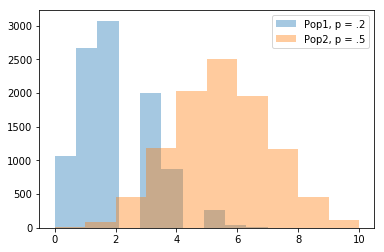

In [125]:
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

plt.hist(pop1, alpha = .4, label ='Pop1, p = .2')
plt.hist(pop2, alpha = .4, label ='Pop2, p = .5')
plt.legend(loc = 'upper right')

mu_1= 2.069 	 sigma_1= 1.25229349595
mu_2= 4.988 	 sigma_2= 1.57412070693
calculated t statistic:  45.8897886188
Ttest_indResult(statistic=45.866837985410505, pvalue=6.0662496531648641e-310)


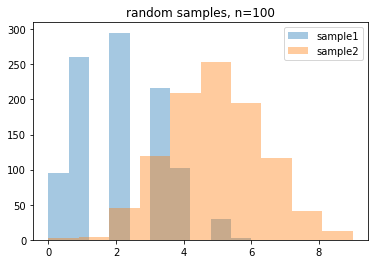

In [126]:
stats = sampling(pop1, pop2, 1000, 'y')

mu_1= 1.97 	 sigma_1= 1.18705517985
mu_2= 5.03 	 sigma_2= 1.35981616405
calculated t statistic:  16.9524533054
Ttest_indResult(statistic=16.867478066987687, pvalue=6.3888665583838985e-40)


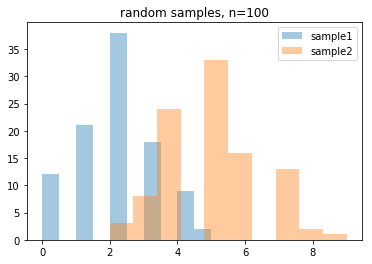

In [127]:
stats = sampling(pop1, pop2, 100, 'y')

mu_1= 1.85 	 sigma_1= 1.45859521458
mu_2= 4.85 	 sigma_2= 1.71099386323
calculated t statistic:  5.96726977816
Ttest_indResult(statistic=5.816175132771896, pvalue=1.1066276742845905e-06)


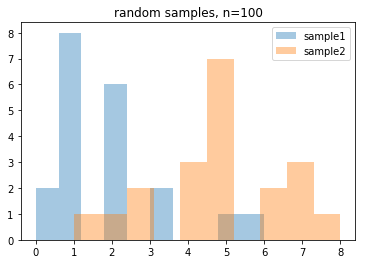

In [128]:
stats = sampling(pop1, pop2, 20, 'y')

The mean and standard deviation vary more as n decreases (which makes sense given an outlier has proportionally more clout in a smaller sample), and the t-statistic and p-value decrease (though in theory, an anomolous sampling could cause the n=20 run to have large t and p values).

In [129]:
def stats_on_stats(m,n):
    rows = []
    for ik in range(m):
        rows.append(sampling(pop1, pop2, n, 'n'))

    df = pd.DataFrame(rows)
    df = df.rename(index = str,columns= {0:'mean1', 1:'std1', 2:'mean2', 3:'std2', 4:'pvalue'})
#     print(df.aggregate(np.mean))
#     print(df.aggregate(np.std))
    return df

In [130]:
df_1000 = stats_on_stats(100,1000)

In [131]:
df_100 = stats_on_stats(100,100)

In [132]:
df_20 = stats_on_stats(100,20)

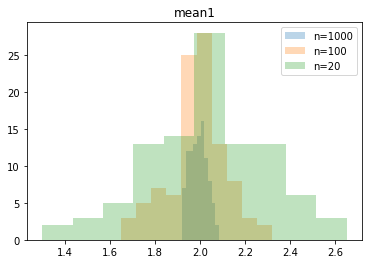

In [133]:
plt.hist(df_1000['mean1'], alpha= .3, label='n=1000')
plt.hist(df_100['mean1'], alpha= .3, label='n=100')
plt.hist(df_20['mean1'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('mean1')

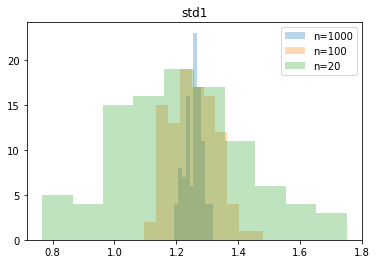

In [134]:
plt.hist(df_1000['std1'], alpha= .3, label='n=1000')
plt.hist(df_100['std1'], alpha= .3, label='n=100')
plt.hist(df_20['std1'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('std1')

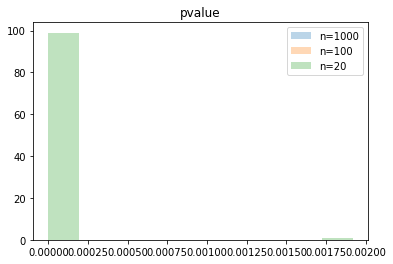

In [135]:
plt.hist(df_1000['pvalue'], alpha= .3, label='n=1000')
plt.hist(df_100['pvalue'], alpha= .3, label='n=100')
plt.hist(df_20['pvalue'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('pvalue')

There is more variation in the statistics as n decreases, which makes sense given that outliers have more clout in small sample sizes, and p values increase, which also makes sense because depending on the sampling at n=20 two populations could be randomly chosen to overlap more and thus have a p-value that reflects a higher probability that they were picked from the same parent population 

### Now with alternative values of p1

In [145]:
def summarize_for_np(p1, p2):
    pop1 = np.random.binomial(10, p1, 10000)
    pop2 = np.random.binomial(10, p2, 10000)
    
    df_1000 = stats_on_stats(100,1000)
    df_100 = stats_on_stats(100,100)
    df_20 = stats_on_stats(100,20)
    
    plt.hist(df_1000['mean1'], alpha= .3, label='n=1000')
    plt.hist(df_100['mean1'], alpha= .3, label='n=100')
    plt.hist(df_20['mean1'], alpha = .3, label='n=20')
    plt.hist(df_1000['mean2'], alpha= .3, label='n=1000')
    plt.hist(df_100['mean2'], alpha= .3, label='n=100')
    plt.hist(df_20['mean2'], alpha = .3, label='n=20')
    plt.legend(loc = 'upper right')
    plt.title('mean1 and mean2')
    plt.show()
    
    plt.hist(df_1000['pvalue'], alpha= .3, label='n=1000')
    plt.hist(df_100['pvalue'], alpha= .3, label='n=100')
    plt.hist(df_20['pvalue'], alpha = .3, label='n=20')
    plt.legend(loc = 'upper right')
    plt.title('pvalue')
    plt.show()
    

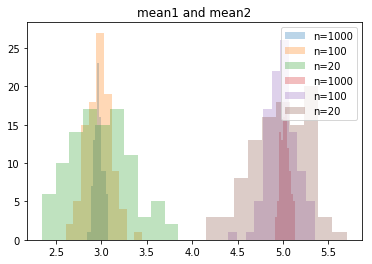

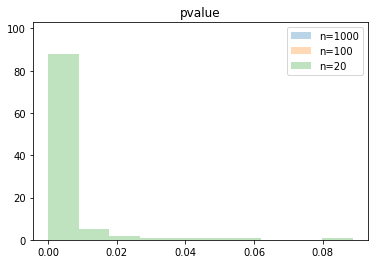

In [157]:
summarize_for_np(.2, .5)

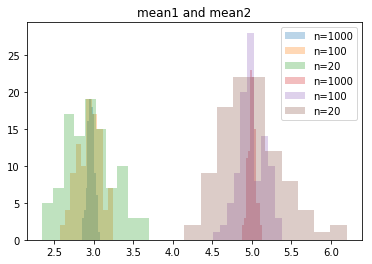

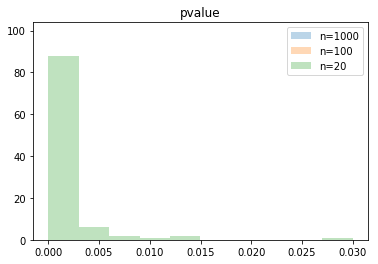

In [158]:
summarize_for_np(.3, .5)

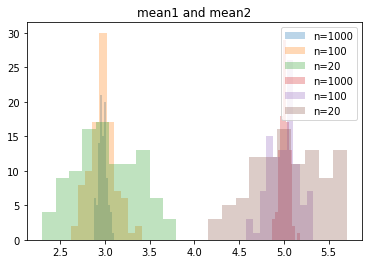

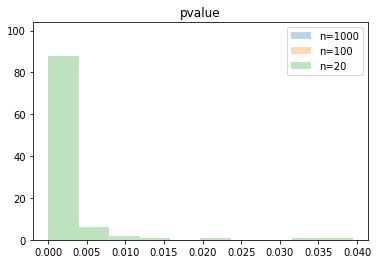

In [164]:
summarize_for_np(.4, .5)

As the values of *p* get closer, samples from the two populations overlap more and the distribution of p-values begins to include higher values

### Now with a different distribution

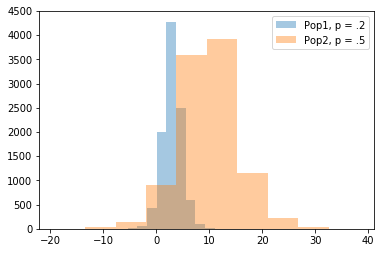

In [168]:
pop1 = np.random.logistic(3, 1, 10000)
pop2 = np.random.logistic(10, 3, 10000)

plt.hist(pop1, alpha = .4, label ='Pop1, p = .2')
plt.hist(pop2, alpha = .4, label ='Pop2, p = .5')
plt.legend(loc = 'upper right')

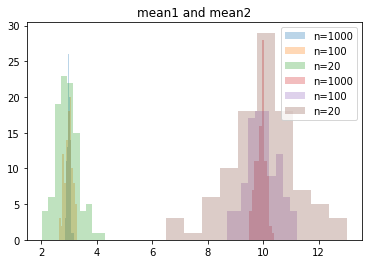

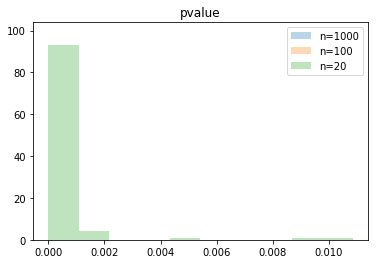

In [169]:
df_1000 = stats_on_stats(100,1000)
df_100 = stats_on_stats(100,100)
df_20 = stats_on_stats(100,20)

plt.hist(df_1000['mean1'], alpha= .3, label='n=1000')
plt.hist(df_100['mean1'], alpha= .3, label='n=100')
plt.hist(df_20['mean1'], alpha = .3, label='n=20')
plt.hist(df_1000['mean2'], alpha= .3, label='n=1000')
plt.hist(df_100['mean2'], alpha= .3, label='n=100')
plt.hist(df_20['mean2'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('mean1 and mean2')
plt.show()

plt.hist(df_1000['pvalue'], alpha= .3, label='n=1000')
plt.hist(df_100['pvalue'], alpha= .3, label='n=100')
plt.hist(df_20['pvalue'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('pvalue')
plt.show()
    

As sample size gets larger, the CLT tells us that we can still use p-values to evaluate whether two sample sets come from the same population.